In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
#from sklearn.utils import shuffle
import random

train_data = pd.read_csv('blogData_train.csv', header=None)
validate_data = pd.read_csv('blogData_validate.csv',  header=None)
test_data = pd.read_csv('blogData_test.csv',  header=None)

train_X = train_data.as_matrix(range(280))
validate_X = validate_data.as_matrix(range(280))
test_X = test_data.as_matrix(range(280))

train_Y = np.ravel(train_data.as_matrix([280]))
validate_Y = np.ravel(validate_data.as_matrix([280]))
test_Y = np.ravel(test_data.as_matrix([280]))

scaler = MinMaxScaler()
print(scaler.fit(train_X))

train_X = scaler.transform(train_X)
validate_X = scaler.transform(validate_X)
test_X = scaler.transform(test_X)

MinMaxScaler(copy=True, feature_range=(0, 1))


Ridge Regression

LAMDA_MIN	RMSE_TEST

0.265608778295 	25.6680515058


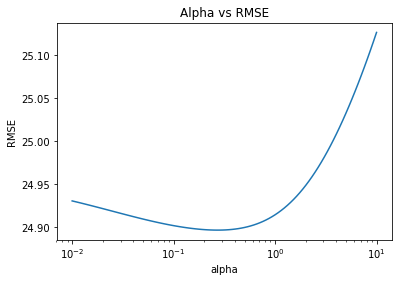

In [4]:
print('Ridge Regression')
alpha = np.logspace(-2,1,100)
rmse = np.array([])
for a in alpha:
    ridge = linear_model.Ridge(fit_intercept=True, alpha = a)
    ridge.fit(train_X,train_Y)
    
    p = ridge.predict(train_X) 
    p2 = ridge.predict(validate_X)
    
    
    rmse_train = mean_squared_error(p, train_Y)**0.5
    rmse_validate = mean_squared_error(p2, validate_Y)**0.5
    
    rmse = np.append(rmse,[rmse_validate])
    #print('{:.3f}\t {:.4f}\t {:.4f}\t'.format(a,rmse_train,rmse_validate))
    

a_min = alpha[np.argmin(rmse)]
ridge2 = linear_model.Ridge(fit_intercept=True, alpha = a_min)
ridge2.fit(train_X,train_Y)
p3 = ridge.predict(test_X)
rmse_test = mean_squared_error(p3, test_Y)**0.5
print '\n','LAMDA_MIN\t','RMSE_TEST'
print '\n',a_min,'\t',rmse_test
ax = plt.gca()

ax.plot(alpha, rmse)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title('Alpha vs RMSE')
plt.axis('tight')
plt.show()

In [5]:
def mySGD(X, Y, alpha, learning_rates, echoMax, sample_size):
    objectives = []
    rows, columns = X.shape
    for learning_rate in learning_rates:
        objective = []
        beta = np.zeros(280)
        randFullArr = range(0,rows)
        obj = 0
        for i in range(0,rows):
            obj += (Y[i] - np.dot(X[i],beta))**2
        obj /= rows
        obj += alpha * np.dot(beta,beta)
        objective.append(obj)
        for echo in range(1,echoMax):
            #random.shuffle(randArr)    
            randArr = random.sample(randFullArr,k=sample_size)
            for i in randArr:
                temp = (np.dot(X[i], beta) - Y[i])
                sgd = 2 * ((temp * X[i]) + (alpha * beta))
                beta -= learning_rate * sgd
                #beta_arr.append(beta[0])
            obj = 0
            for i in range(0,rows):
                obj += (Y[i] - np.dot(X[i],beta))**2
            obj /= rows
            obj += alpha * np.dot(beta,beta)
            objective.append(obj)
        objectives.append(objective)
    return objectives

Problem 2(b) SGD Regression with a fixed learning rate
min_objective	1246.77795296


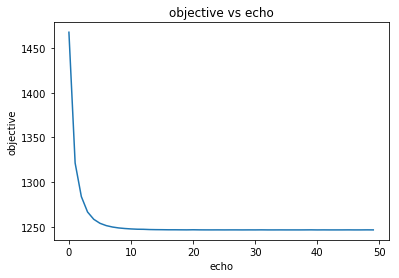

In [6]:
print 'Problem 2(b) SGD Regression with a fixed learning rate'

learning_rates = [0.000005]
echoMax = 50
rows, columns = train_X.shape
objectives = []
objectives = mySGD(train_X,train_Y,a_min,learning_rates, echoMax, rows)
ax = plt.gca()
print 'min_objective\t', np.min(objectives)
ax.plot(range(0,echoMax),np.transpose(objectives))
plt.xlabel('echo')
plt.ylabel('objective')
plt.title('objective vs echo')
plt.axis('tight')
plt.show()

Problem 2(c) SGD Regression with a range of learning rate


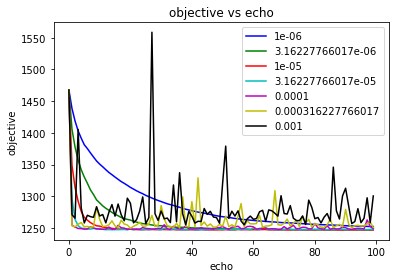

In [9]:
print 'Problem 2(c) SGD Regression with a range of learning rate'

learning_rates = np.logspace(-6, -3, 7)
echoMax = 100
objectives = []
objectives = mySGD(train_X,train_Y,a_min,learning_rates, echoMax, 15000)
ax = plt.gca()
#print 'min_objective\t',min(objectives)
colors = 'bgrcmyk' 
for j in range(0, len(colors)):
    ax.plot(range(0,echoMax),objectives[j], color = colors[j], label = learning_rates[j])
plt.xlabel('echo')
plt.ylabel('objective')
plt.title('objective vs echo')
plt.legend(loc='upper right')
plt.axis('tight')
plt.show()

In [10]:
good_learning_rate = learning_rates[np.argmin(objectives,axis=0)[0-1]]
objective = []
rows, columns = train_X.shape
randArr = range(0,rows)
beta = np.zeros(280)
for echo in range(0,100):
    random.shuffle(randArr)    
    #randArr_shuffle = randArr
    for i in randArr:
        temp = (np.dot(train_X[i], beta) - train_Y[i])
        sgd = 2 * ((temp * train_X[i]) + (a_min * beta))
        beta -= good_learning_rate * sgd
y = []
rows, columns = test_X.shape
for i in range(0,rows):
    y.append(np.dot(test_X[i],beta))
rmse_test_c = mean_squared_error(y, test_Y)**0.5
print '\n','Lambda_MIN\t', 'Learning_rate\t\t','RMSE_TEST'
print '\n', a_min, '\t', good_learning_rate, '\t',rmse_test_c


Lambda_MIN	Learning_rate		RMSE_TEST

0.265608778295 	3.16227766017e-06 	26.435866229


Problem 2(d)

Comparing the result of RMSE in 2(a) with the result of RMSE in 2(c), it shows that the result in 2(a) is much better than 2(c). Maybe I did not find the best learning_rate to obtain the best coefficients. The result in 2(c) depends on the learning_rate and echos. It is hard to find a balance here to obtain the best coeeficients. 